# Max-Cut Sample - Hybrid


In [1]:
import matplotlib.pyplot as plt
import networkx as nx
import dwave_networkx as dnx
import dimod

### Helper Functions

In [2]:
def draw_graph(G,cut,pos):
    colors = [ 'g' if n in cut else 'r' for n in G.nodes() ]
    nx.draw(G,with_labels=False,alpha=0.6,node_size=50,node_color=colors,pos=pos)
    
def cut_size(G,cut):
    edges = 0
    for c in cut:
        for n in G.neighbors(c):
            if n not in cut:
                edges += 1
    return edges
    


## Problem as Graph

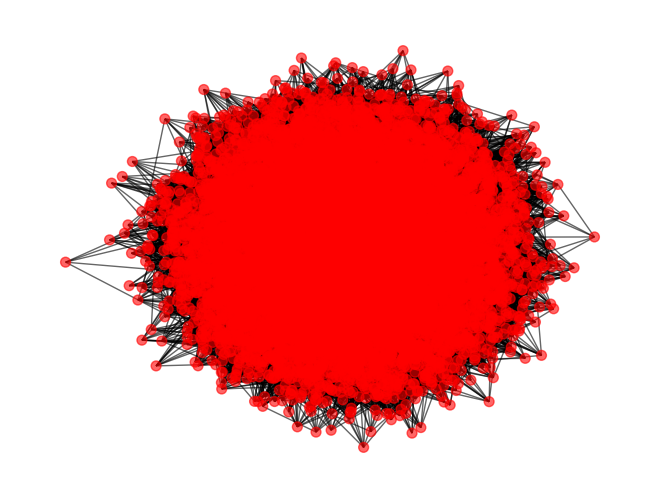

In [3]:
# fixed graph
#G = nx.Graph()
#G.add_nodes_from([0,1,2,3,4])
#G.add_edges_from([(0,1),(1,2),(2,3),(3,0),(0,4),(2,4),(3,4),(1,4)])

# loaded sample graph
G = nx.read_edgelist('../sample_graphs/10000-nodes-sample.dat',nodetype=int)

#n = 4
#p = 0.3
#H = nx.gnp_random_graph(n, p)
pos = nx.spring_layout(G)

#nx.draw(G,with_labels=True,alpha=0.6,node_size=300,pos=pos)
draw_graph(G,{},pos)

In [4]:
print('Graph: ',len(G.nodes()), 'nodes, density: ',nx.density(G))

Graph:  10000 nodes, density:  0.0019987198719871985


## Exact Solver

In [5]:
exactsolver = dimod.ExactSolver()

In [6]:
#import time

#ts_start = time.time()
#cut = dnx.maximum_cut(G, exactsolver)
#ts_stop = time.time()
#print(cut)
#print('elapsed time of exact solver (s): ',round(ts_stop - ts_start,2))

In [7]:
#draw_graph(G,cut,pos)

In [8]:
#print('cut-size: ',cut_size(G,cut))

## Hybrid Solver

In [9]:
from dwave.system import LeapHybridSampler

label = 'max-cut, n: ' + str(len(G.nodes())) + ', d: ' + str(round(nx.density(G),2)) + ' hybrid'

hybridsampler = LeapHybridSampler()
cut = dnx.maximum_cut(G, hybridsampler,label=label)

In [10]:
cut

{0,
 4,
 5,
 6,
 7,
 9,
 14,
 18,
 21,
 22,
 29,
 30,
 35,
 36,
 38,
 40,
 42,
 48,
 50,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 64,
 65,
 66,
 68,
 71,
 75,
 76,
 77,
 80,
 81,
 82,
 83,
 85,
 86,
 87,
 89,
 92,
 93,
 95,
 100,
 102,
 103,
 104,
 105,
 107,
 108,
 109,
 112,
 114,
 117,
 118,
 122,
 123,
 124,
 126,
 127,
 130,
 135,
 138,
 144,
 147,
 148,
 149,
 150,
 151,
 153,
 155,
 156,
 157,
 159,
 160,
 161,
 163,
 164,
 166,
 167,
 168,
 170,
 174,
 176,
 178,
 180,
 182,
 183,
 184,
 185,
 186,
 189,
 191,
 192,
 193,
 194,
 195,
 196,
 199,
 200,
 202,
 203,
 204,
 208,
 209,
 212,
 213,
 215,
 217,
 218,
 221,
 225,
 228,
 230,
 231,
 239,
 240,
 242,
 243,
 246,
 248,
 250,
 252,
 253,
 254,
 256,
 257,
 258,
 261,
 262,
 266,
 267,
 268,
 270,
 271,
 276,
 279,
 282,
 283,
 285,
 290,
 291,
 292,
 293,
 295,
 298,
 299,
 303,
 304,
 308,
 309,
 311,
 314,
 315,
 317,
 320,
 323,
 325,
 329,
 331,
 332,
 334,
 337,
 339,
 341,
 342,
 345,
 346,
 347,
 350,
 351

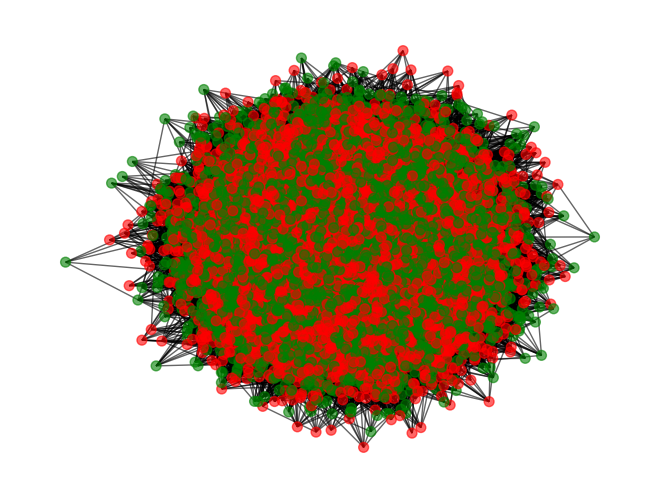

In [11]:
draw_graph(G,cut,pos)

In [12]:
print('cut-size: ',cut_size(G,cut))

cut-size:  66760


In [13]:
len(list(G.neighbors(3455)))

22